### **Trabajo Práctico Nº1**
### *Método de la Potencia*

In [27]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

**Ejercicio 1**

  Empecemos por por hacer un programa tal que dada una matriz cuadrada de números reales, se le pueda hacer sucesivas aplicaciones del método de la potencia.

  Para eso vamos a usar el cociente de Rayleigh ya que con eso podemos minimizar la norma $∥Av − αv∥_{2}$ , siendo $α$ un autovalor aproximado del vector $v$.


In [28]:
def métodoPotencia (A, k):
  v = np.random.rand(A.shape[0],1)
  a = np.empty((0,1),float)
  for i in range(k):
    Av = A@v 
    v = Av / np.linalg.norm(Av, 2)
    r = np.transpose(v)@A@v / (np.transpose(v)@v)
    a = np.append(a,r,axis=0)
    
  return (a)

**Ejercicio 2**

Apliquemos el programa definido a una matriz de tamaño 100 e iteremos 100 veces. Analicemos los resultados con un gráfico.

In [29]:
def gráficoAutovalores(A, k):

  #empecemos por obtener todos los datos que se van a necesitar para graficar y analizar
  mayorAva = np.linalg.norm(np.linalg.eigvals(A), np.inf)
  a = métodoPotencia(A, k)
  it = np.full((k,1), mayorAva) 
  #vector it con las mismas dimensiones que "a" para graficar una recta constante igual al ava maximo para asi comparar cada punto con los de "a"


  #gráfico que se obtiene "iteraciones vs autovalores aproximados"
  plt.figure(figsize=(50,6))
  plt.title('Aproximación de los autovalores en cada iteración')
  plt.xlabel('Iteraciones')
  plt.xticks(range(k))
  plt.ylabel('Autovalores')
  plt.grid()

  plt.plot(a, 'rD-.')
  plt.plot(it, 'gx-')
  plt.legend(('Autovalores aproximados', 'Mayor autovalor'), prop = {'size': 10}, loc='lower right')

  plt.show()

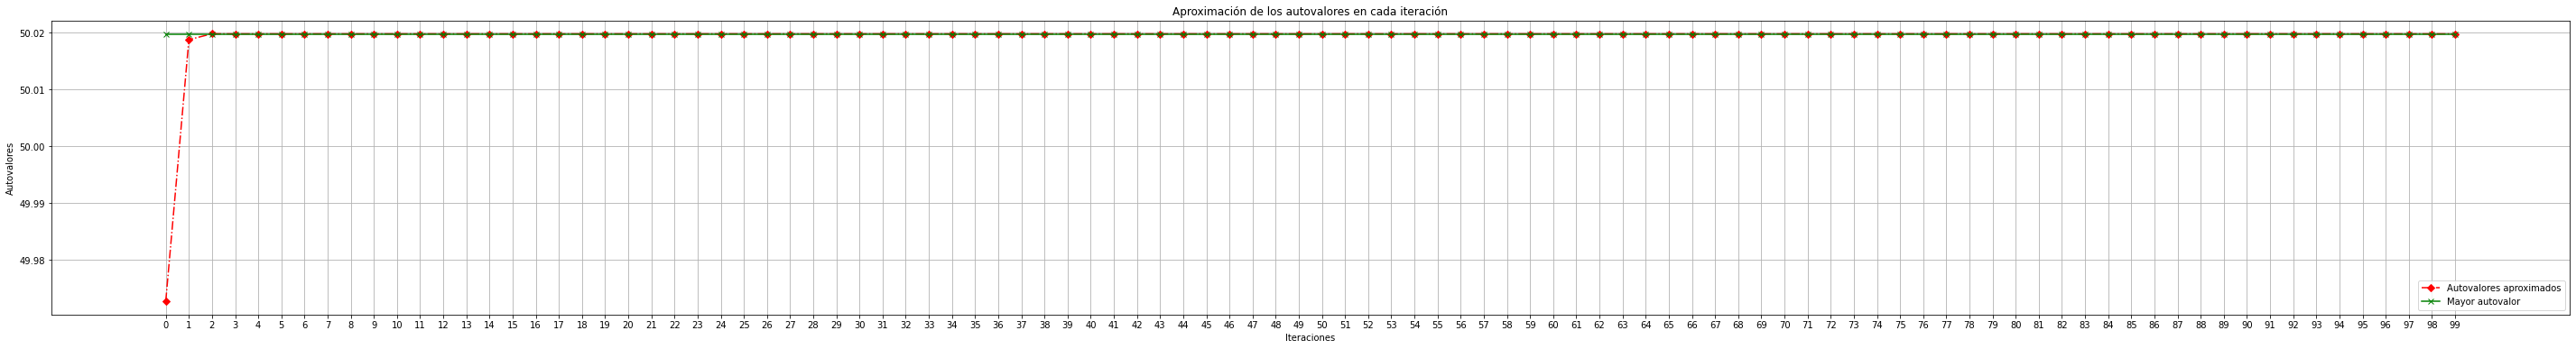

In [30]:
A = np.random.rand(100,100)
gráficoAutovalores(A, 100)

  Si observamos el gráfico, teniendo en cuenta que la función verde representa el autovalor de mayor módulo de A, y la función roja la aproximación de los autovalores con cada iteración, se puede ver que las distancias entre ambas rectas se acorta mucho en cada paso.
  
  Ya en las primeras iteraciones se puede ver que la distancia entre ambas se va anulando, a medida que la función de las aproximaciones se va haciendo constante, por lo que se puede decir que el método converge rápidamente.

**Ejercicio 3**

Veamos que la velocidad de convegencia está dada por la relación entre los dos autovalores de mayor módulo.

In [31]:
def matrizAvasReales(C, K):
  return(((1/2)*(C + np.transpose(C)))+ K*np.eye(C.shape[0]))

In [32]:
def aproximarPorCuadradosMínimos(e, n):
  
  #dados un grupo de pares ordenados en el plano, aplico el método de ajuste por mínimos cuadrados para obtener la función lineal 
  #que mejor se aproxime a todos

  #vector de mismas dimensiones que e, que en cada cellda contiene el número de iteración
  it = np.empty((n, 1))
  for i in range(n):
    it[i] = i

  #aplico fórmulos del método según los datos
  sumaIT = np.sum(it)
  sumaITpotencias = np.sum(np.power(it, 2))
  sumaValores = np.sum(e)
  sumaExIt = np.sum(np.multiply(e, it))

  #obtengo pendiente, ordenada al origen y valores de la función de acuerdo al número de iteración
  m = (100*sumaExIt - sumaIT*sumaValores)/(100*sumaITpotencias - abs(sumaIT)**2)
  b = (sumaValores*sumaITpotencias - sumaIT*sumaExIt)/(100*sumaITpotencias - abs(sumaIT)**2)
  f = (it*m) + b

  return(f, m, b)

In [33]:
def funciónLineal(p, b, n):

  #función lineal dada para comparar 

  fl = np.empty((n, 1)) #vector que contiene el número de iteración
  for i in range(n): #aplico la función de acuerdo a la k-ésima iteración
    fl[i] = 2*np.log(p)*i + np.log(b)
  return(fl)

In [34]:
def gráficosErrores(B, k, pt2 = 0, pt3 = 0):

  #pt2 = 0 y pt3=0 son para indicar si graficar o no los OPTATIVOS. 
  #Si se llama a la función poniendo 0 en sus variable o no escribiendo nada, no se grafican. Poniendo cualquie otro valor sí.

  #obtenemos todos los datos que vamos a necesitar para graficar

  lambda1 = sorted(np.linalg.eigvals(B), key = abs, reverse=True)[0] #lambda de mayor módulo
  lambda2 = sorted(np.linalg.eigvals(B), key = abs, reverse=True)[1] #lambda de segundo mayor módulo
  ite = np.full((k,1), lambda1) #función constante de ava de mayor módulo
  b = métodoPotencia(B, k) 
  e = np.absolute(np.subtract(b,ite)) #vector de errores

  #gráficos

  #gráfico de "iteraciones vs error con respecto a ava de mayor módulo". Este siempre se va a dibujar

  plt.figure(figsize=(50,6))
  plt.title('Errores en función del número de iteración')
  plt.xlabel('Iteraciones')
  plt.xticks(range(k))
  plt.ylabel('Errores')
  plt.grid()
  plt.plot(e, 'bp-')

  #gráfico OPTATIVO de "iteraciones vs nùmero del que depende la velocidad de convergencia"

  if (pt2 != 0): 
    el = np.log(e) #log(e)

    plt.figure(figsize=(50,6))
    plt.title('Diferencial errores según iteración')
    plt.xlabel('Iteraciones')
    plt.xticks(range(k))
    plt.ylabel('Diferencial errores')
    plt.grid()

    plt.plot(el, 'kp-')

    #gráfico OPTATIVO de ajuste de valores obtenidos anteriormente y función que buscábamos obtener. Observar que no se puede graficar estos si 
    #no se graficó lo anterior (la parte 2)
    
    if (pt3 != 0):
      
      ajuste = aproximarPorCuadradosMínimos(el, el.shape[0])
    
      plt.plot(ajuste[0], 'm*-.')
      plt.plot(funciónLineal(lambda2/lambda1, e[0], e.shape[0]), 'ys:')

      plt.legend(('Logaritmo de errores', 'Ajuste por mínimos cuadrados', 'Función lineal otorgada'), prop = {'size': 10}, loc='upper right')

      print('Pendiente obtenida:', ajuste[1])
      print('Pendiente a comparar:', 2*np.log(lambda2/lambda1))

      print('Ordenada al origen obtenida:', ajuste[2])
      print('Ordenada al origen a comparar:',np.log(e[0][0]))

  plt.show()

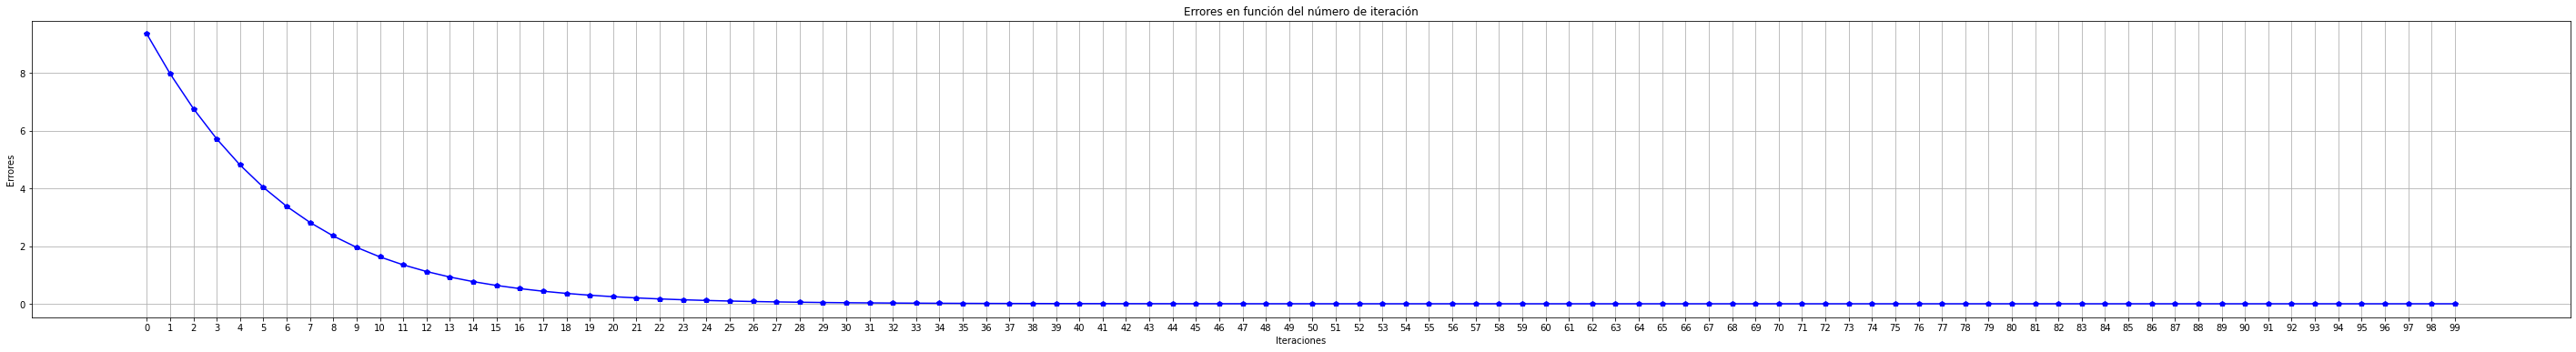

In [35]:
C = np.random.rand(100,100)
B = matrizAvasReales(C, 500)
gráficosErrores(B, 100)

La función a simple vista parece ser una función exponencial (con exponente negativo).

Teniendo en cuenta que esta función representa el error de cada autovalor en cada iteración, que la velocidad de una función se puede calcular con su derivada (en este caso estaríamos hablando de cómo va disminuyendo el error en cada iteración), y que dicha velocidad está determinada por $(\frac{λ_{2}}{λ_{1}})^2$, podemos tener la intuición de que la función es de la forma $e^{-a(\frac{λ_{2}}{λ_{1}})^2x+b}$.

Recordando que $\ln(e^{x}) = x $, apliquemos entonces la función inversa para poder visulizar bien el exponente, cuya pendiente no solo determina la magnitud y sentido de velocidad de convergencia, sino que obtenemos el dominio de la función, que nos muestra cómo es la relación entre los errores por cada iteración.

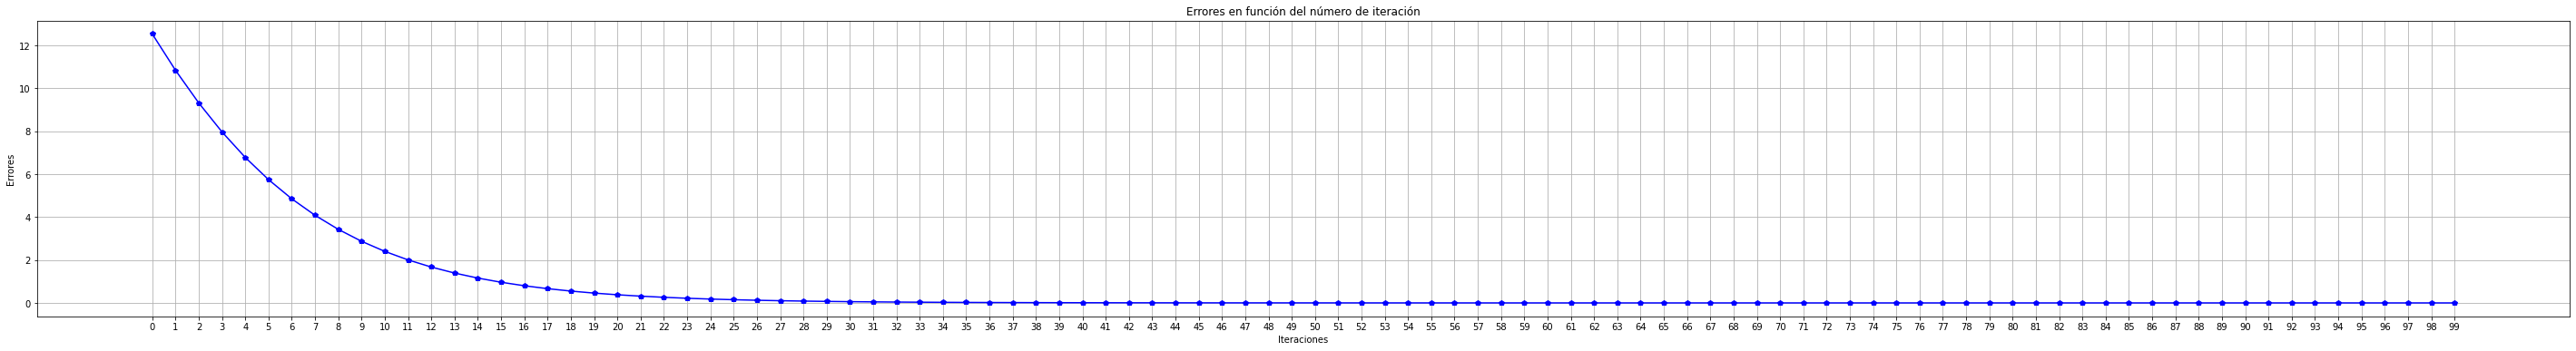

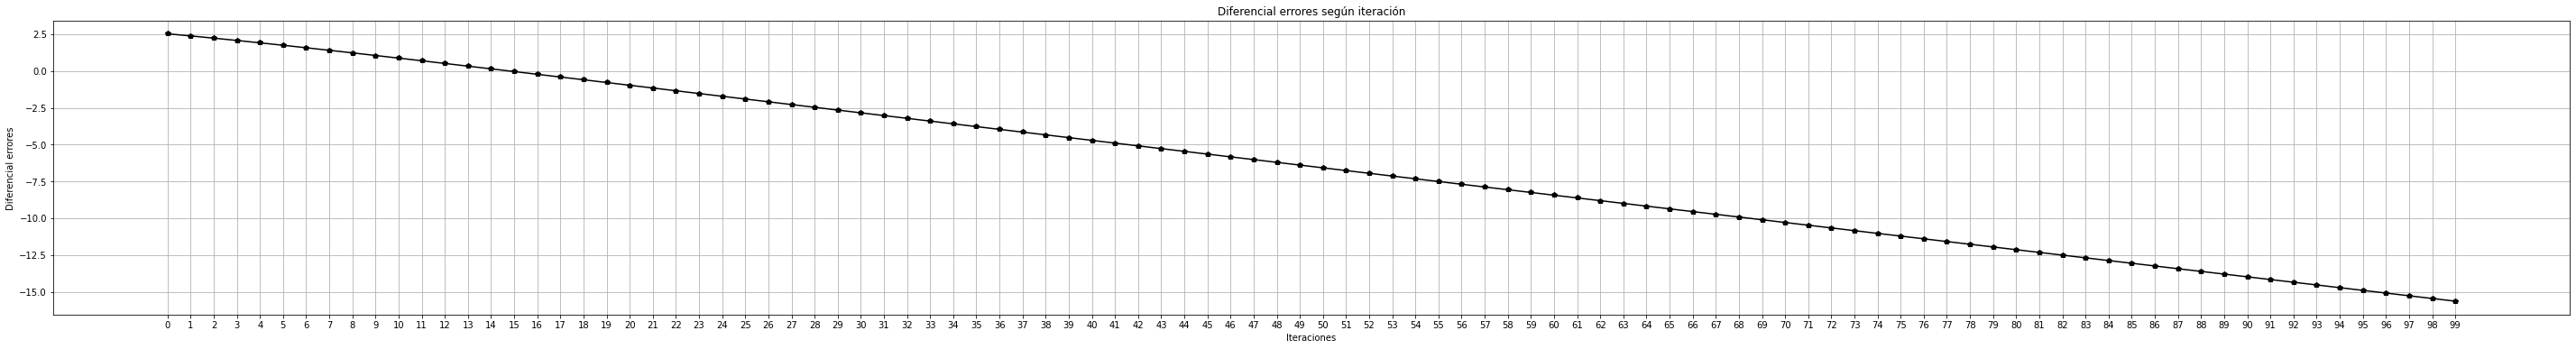

In [36]:
gráficosErrores(B,100, 1)

Parece que obtuvimos una función lineal. Ajustémosla con el método de cuadrados mínimos y veamos cuál es su pendiente y comparemos con la función $2\ln(\frac{λ_{2}}{λ_{1}})+ \ln(e_{0})$.

Pendiente obtenida: -0.18717429791215237
Pendiente a comparar: -0.17513104892823678
Ordenada al origen obtenida: 2.543218143806449
Ordenada al origen a comparar: 2.400869032330055


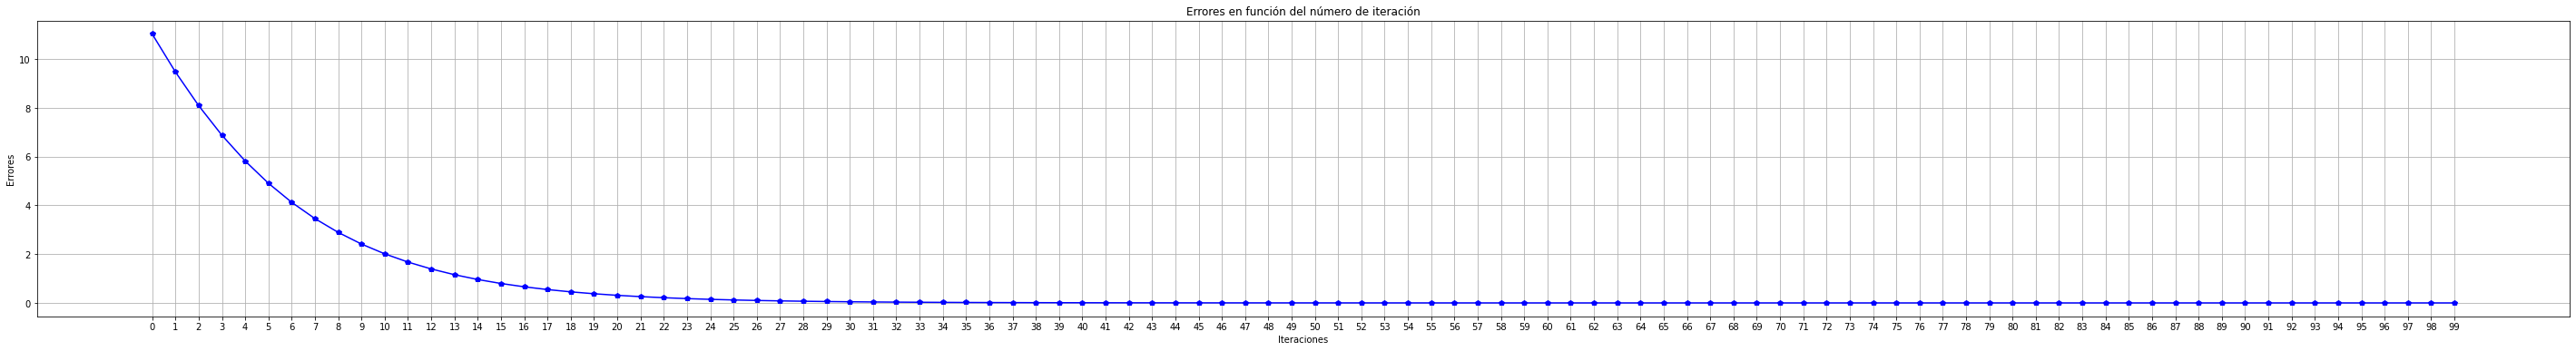

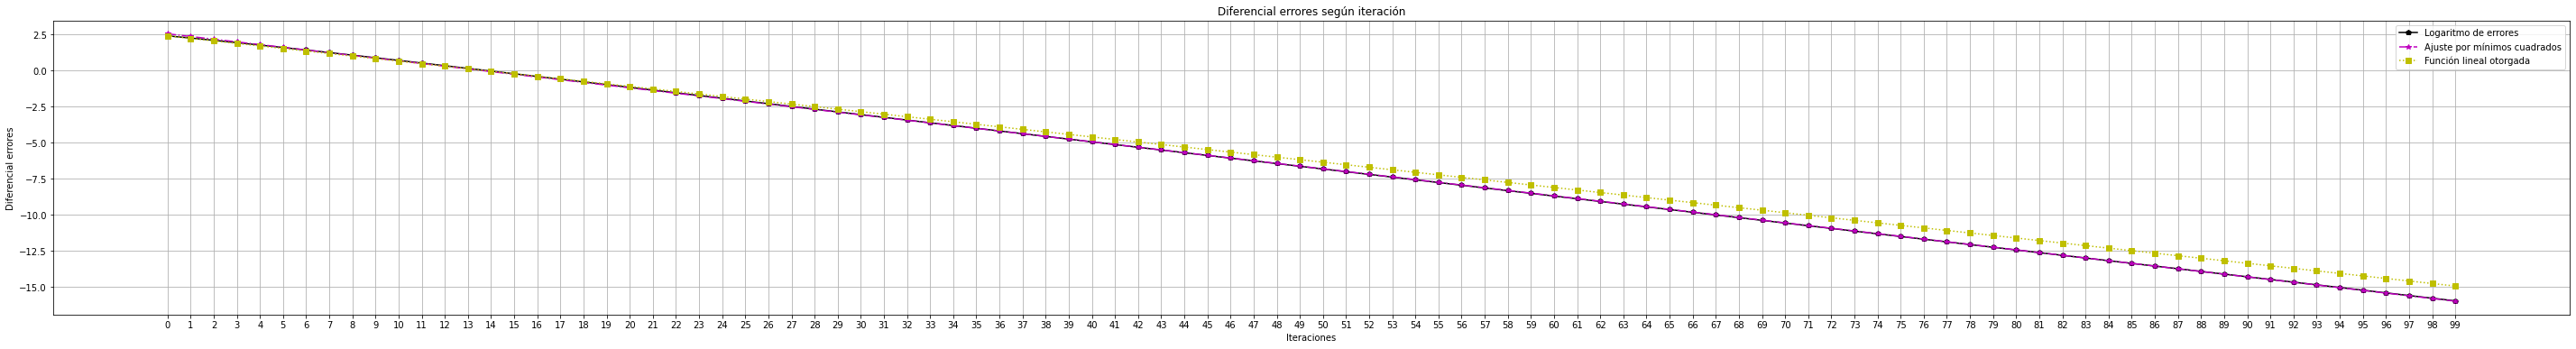

In [37]:
gráficosErrores(B, 100, 1, 1)

Como se puede observar, si bien no tienen pendientes iguales, son muy parecidas.


**Ejercicio 4**

Repitamos el experimento para distintas iteraciones, K=1000, 2000 y 5000, y comparemos las velocidades.

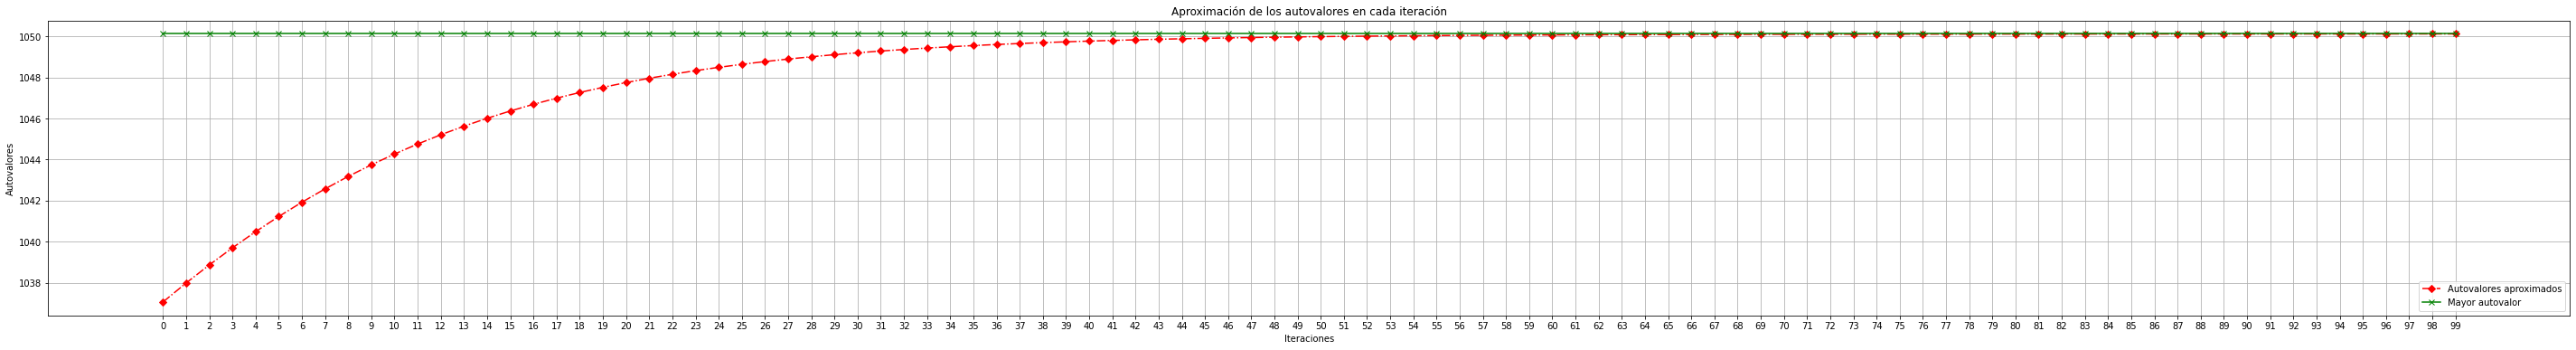

Pendiente obtenida: -0.09636092848666314
Pendiente a comparar: -0.08983016597283665
Ordenada al origen obtenida: 2.513780913883491
Ordenada al origen a comparar: 2.375950901501628


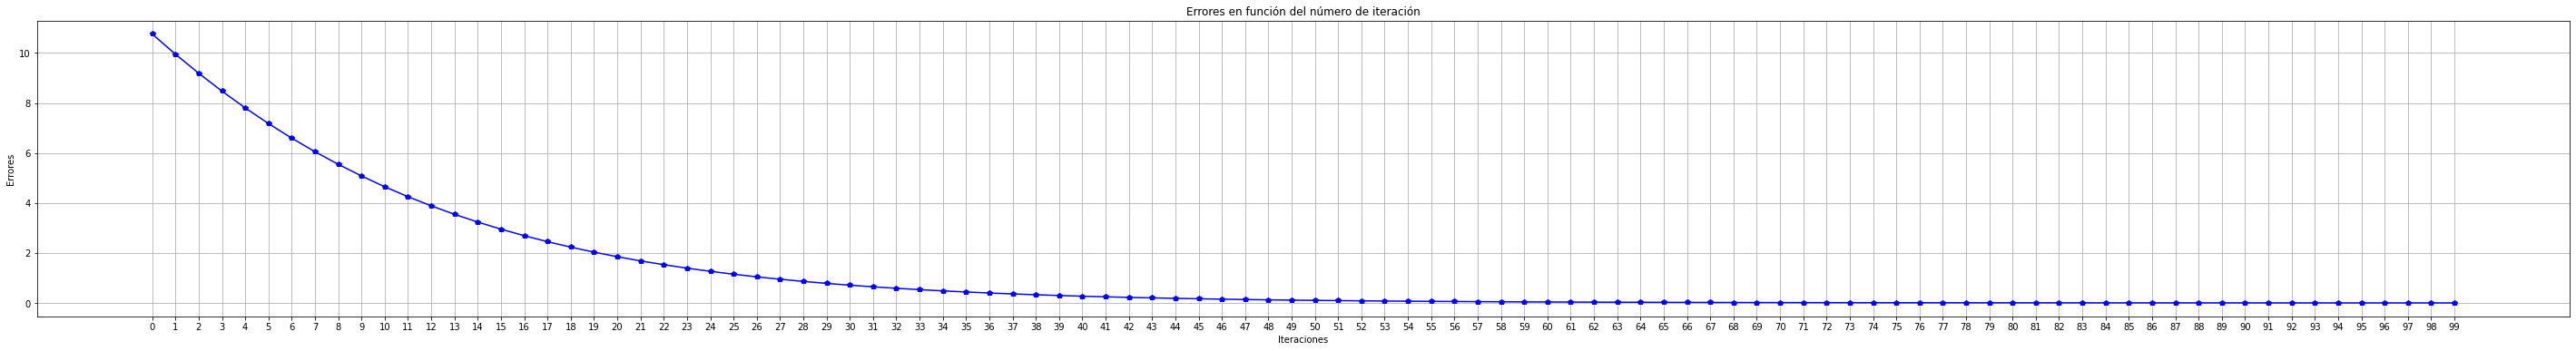

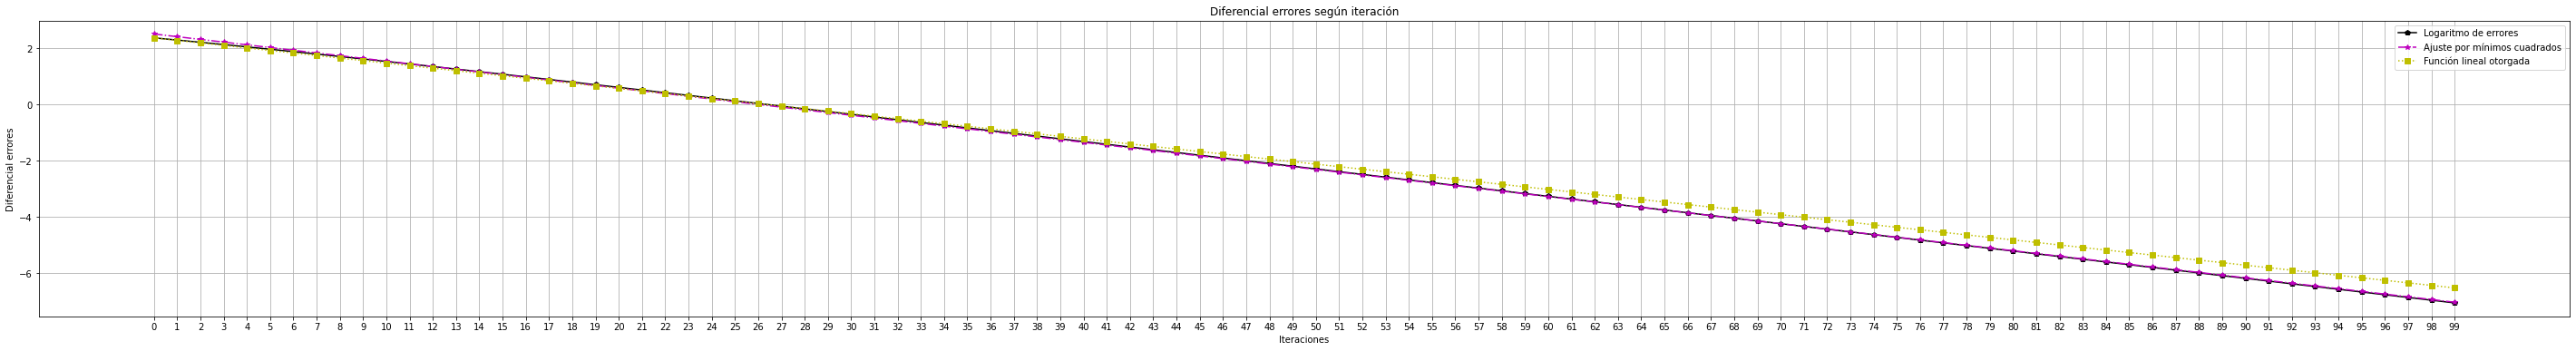

In [38]:
B = matrizAvasReales(C, 1000)
gráficoAutovalores(B, 100)
gráficosErrores(B, 100, 1, 1)

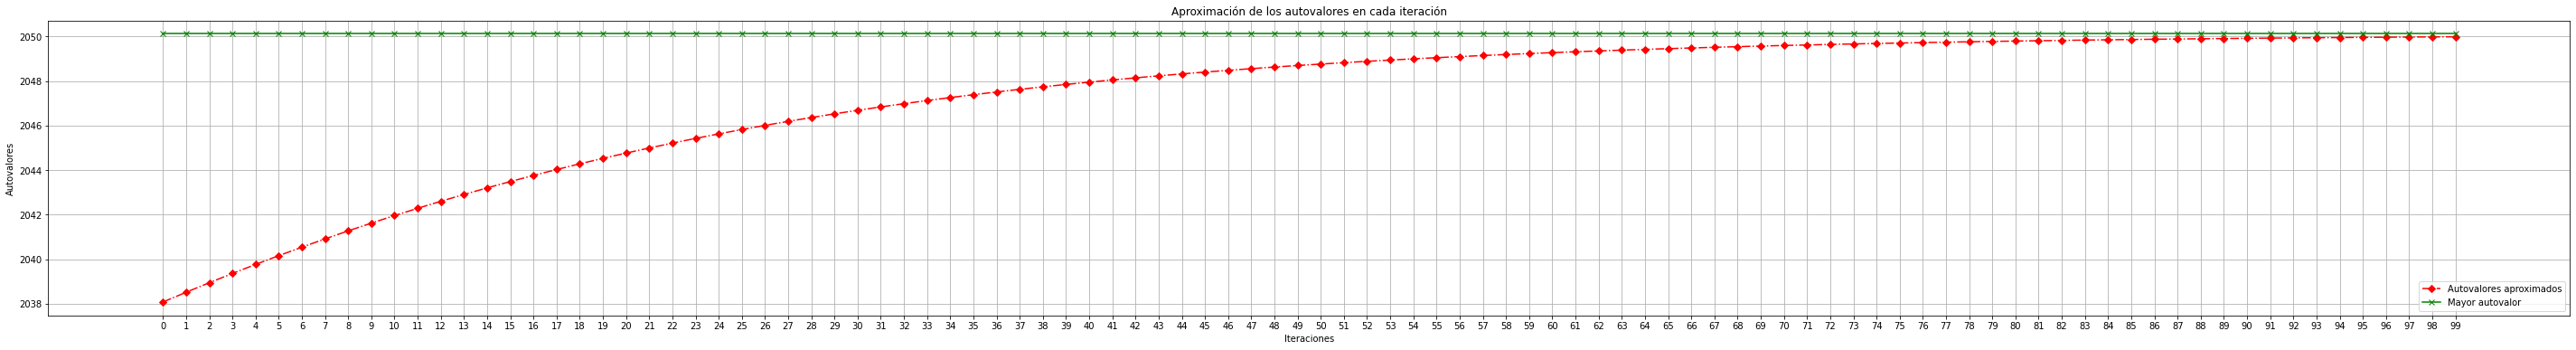

Pendiente obtenida: -0.0475871032492541
Pendiente a comparar: -0.0455089408039747
Ordenada al origen obtenida: 2.3965951932373653
Ordenada al origen a comparar: 2.3114296013859823


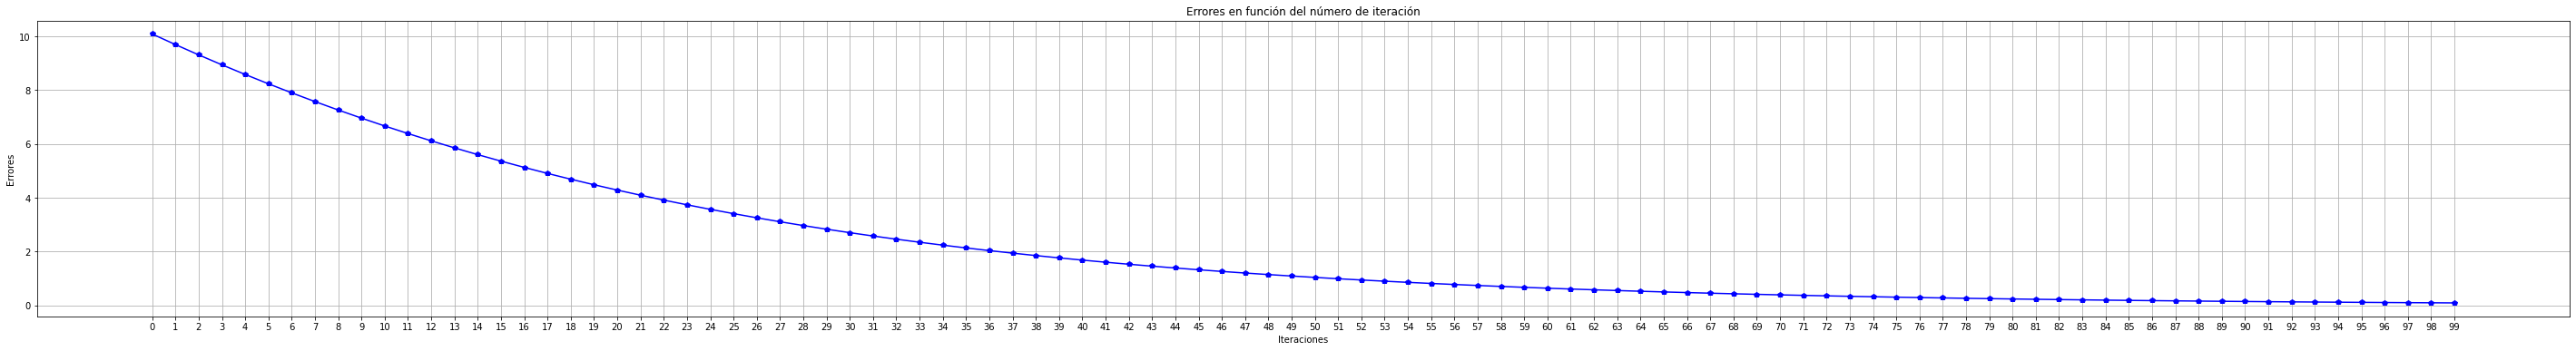

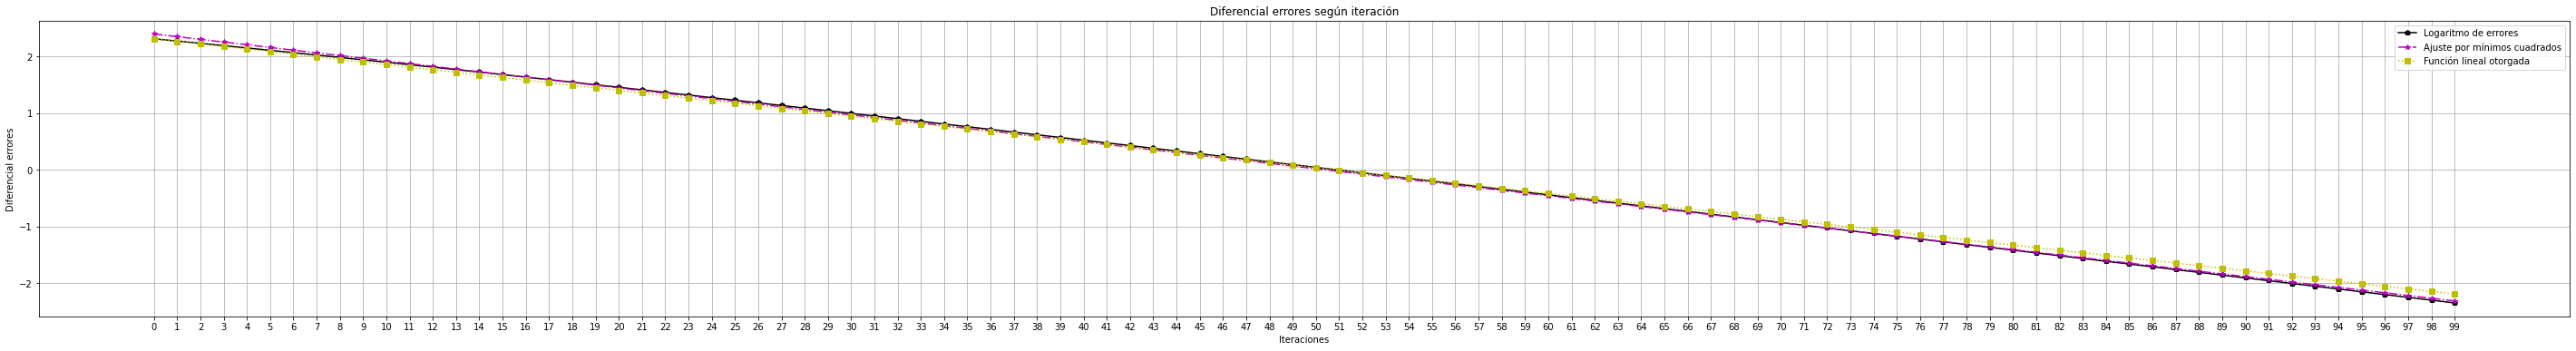

In [39]:
B = matrizAvasReales(C, 2000)
gráficoAutovalores(B, 100)
gráficosErrores(B, 100, 1, 1)

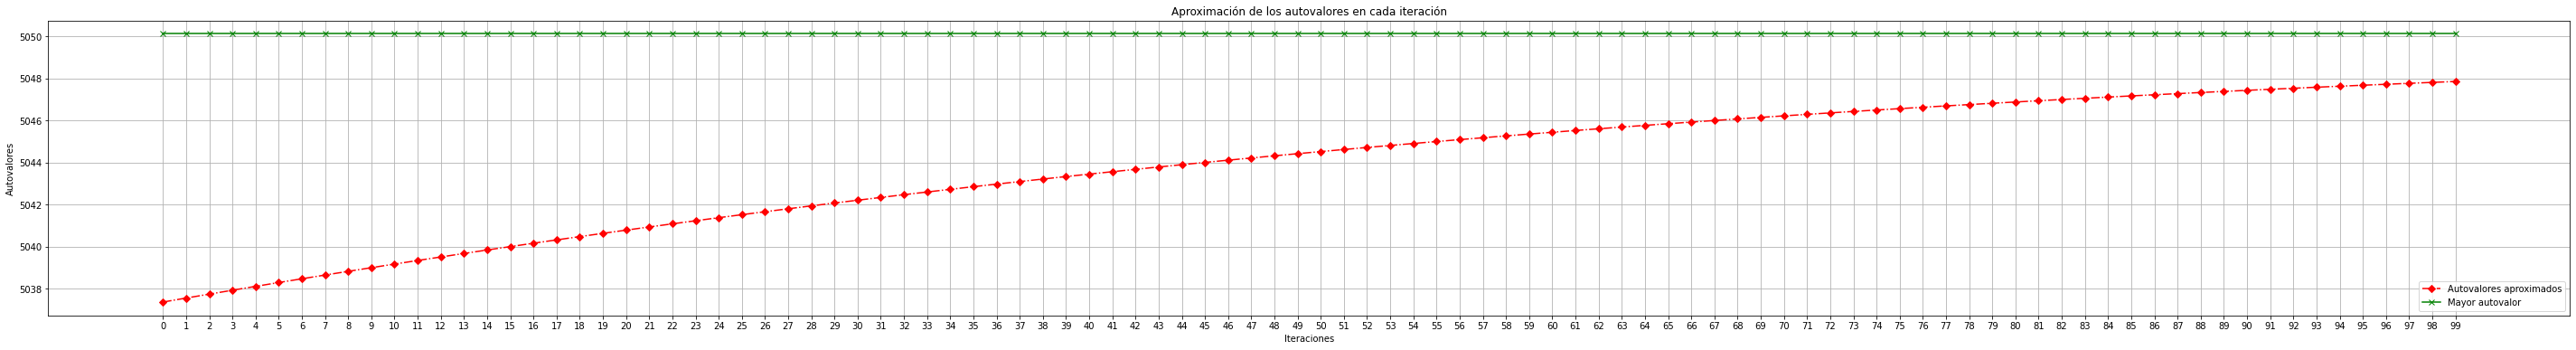

Pendiente obtenida: -0.017687999169024346
Pendiente a comparar: -0.01834988355658907
Ordenada al origen obtenida: 2.496617643371841
Ordenada al origen a comparar: 2.461864564954942


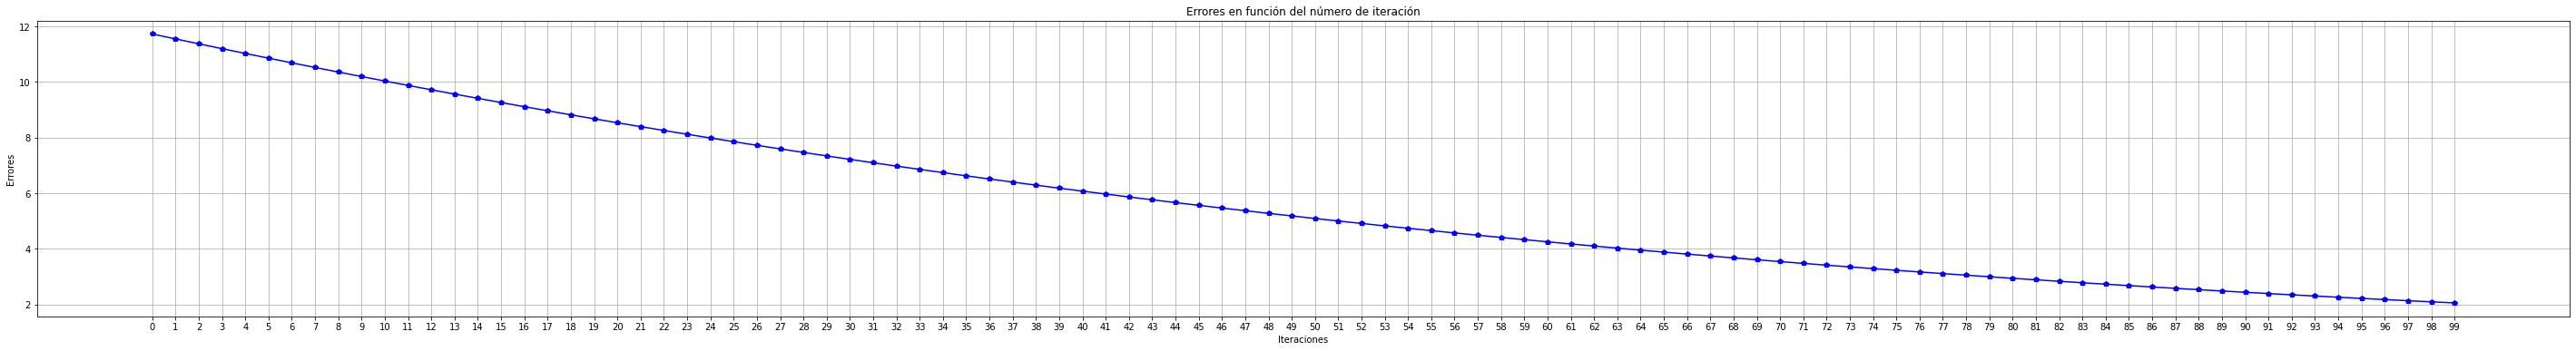

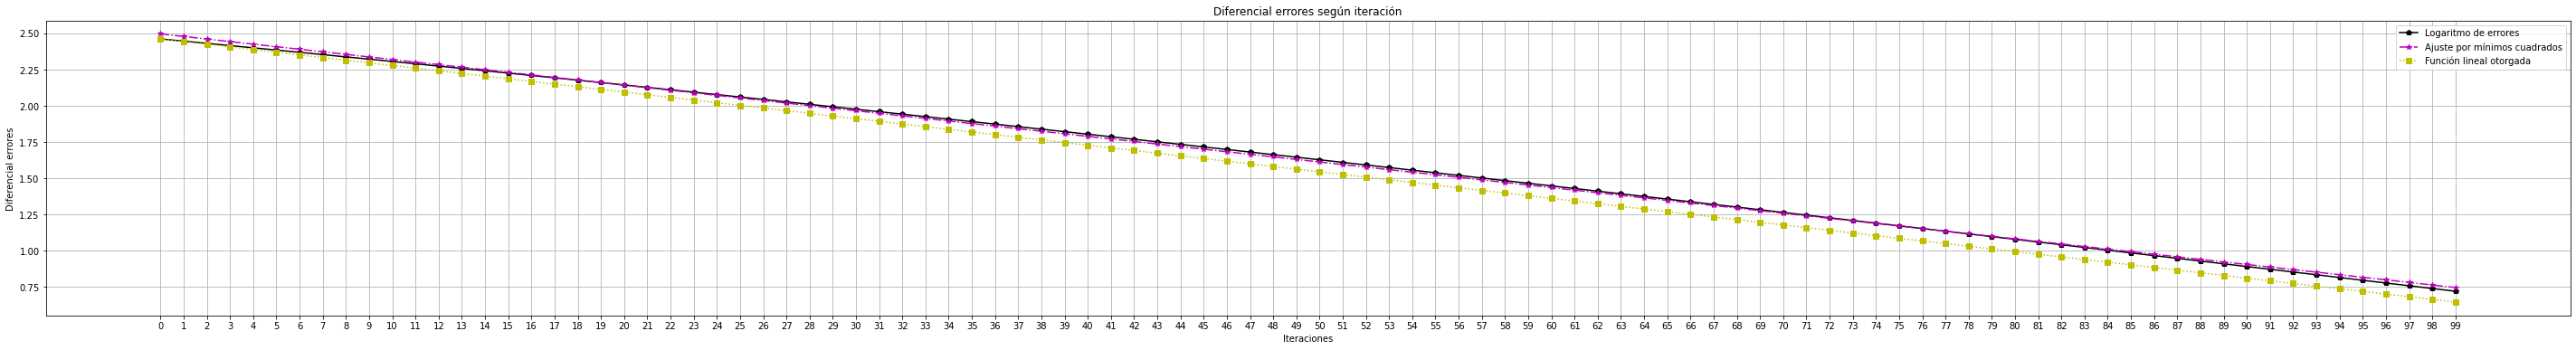

In [40]:
B = matrizAvasReales(C, 5000)
gráficoAutovalores(B, 100)
gráficosErrores(B, 100, 1, 1)

Observemos que a medida que crece K (los valores en la diagonal principal), la función roja tarda más en parecerse a la función verde, y las pendientes que aproximan a cada punto de la función azul se acercan más a 0, es decir que la velocidad de convergencia disminuye.

Esto se debe a la propiedad: "λ + μ es autovalor de Α + μ𝐼, con el mismo autovector".

Sabiendo que la velocidad está determinada por $2\ln(\frac{λ_{2}}{λ_{1}})$, ahora va quedar determinada por $2\ln(\frac{λ_{2} + \mu}{λ_{1} + \mu})$ y teniendo en cuenta que $|{λ_{1}}| > |{λ_{2}}|$ tenemos que 
$2*lim_{n\to\infty} \ln(\frac{λ_{2} + \mu}{λ_{1} + \mu}) = 0 $.
